In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df_1 = pd.read_csv("Admission_Predict.csv")
df_1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print("Shape", df.shape)
print("Shape", df_1.shape)

Shape (500, 9)
Shape (400, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.drop(columns=["Serial No."], inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
range_ft = pd.DataFrame({"GRE Score": [df["GRE Score"].min(), df["GRE Score"].max()],
                        "TOEFL Score": [df["TOEFL Score"].min(), df["TOEFL Score"].max()], 
                        "University Rating":[df["University Rating"].min(), df["University Rating"].max()], 
                        "SOP": [df["SOP"].min(), df["SOP"].max()],
                        "LOR": [df["LOR "].min(), df["LOR "].max()],
                        "CGPA": [df["CGPA"].min(), df["CGPA"].max()],
                        "Research": [df["Research"].min(), df["Research"].max()],
                        "Chance of Admit": [df["Chance of Admit "].min(), df["Chance of Admit "].max()]
                        }, index=["min", "max"])

range_ft

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
min,290,92,1,1.0,1.0,6.80,0,0.34
max,340,120,5,5.0,5.0,9.92,1,0.97


In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
y = df["Chance of Admit "]
X = df.drop(columns=["Chance of Admit "])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(16, activation="relu", input_dim=7))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273 (1.07 KB)
Trainable params: 273 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="mean_squared_error", optimizer="Adam")
history = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2)


Epoch 1/500

10/10 [==============================] - 1s 37ms/step - loss: 0.4953 - val_loss: 0.3402
Epoch 2/500
10/10 [==============================] - 0s 9ms/step - loss: 0.2659 - val_loss: 0.1299
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0937 - val_loss: 0.0429
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0404 - val_loss: 0.0528
Epoch 5/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0377 - val_loss: 0.0439
Epoch 6/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0295
Epoch 7/500
10/10 [==============================] - 0s 13ms/step - loss: 0.0233 - val_loss: 0.0239
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.0208
Epoch 9/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.0182
Epoch 10/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0154 - val_loss: 0.0156
Epoc

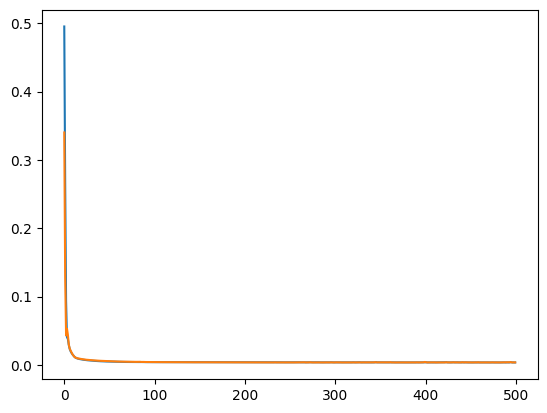

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [19]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [20]:
y_pred[0]

array([0.9296055], dtype=float32)

In [21]:
print("R2 Score is: ", r2_score(y_test, y_pred))
print("Mean Absolute Error is: ", mean_absolute_error(y_test, y_pred))

R2 Score is:  0.7915986002190485
Mean Absolute Error is:  0.04712621372938156


In [22]:
model.save("Admission_Model.h5")

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
